# Monte Carlo Simulation of Investment Portfolio Performance: 
> Descriptive Statistics, Hypothesis Testing, and Variance Reduction Techniques

## Example-1

1. **Objective:**

    The objective of of the present notebook is to simulate the growth of a hypothetical investment portfolio over a certain time period and analyze its performance. We'll use Monte Carlo simulation to estimate the portfolio's potential future value and assess the associated risks.

2. **Steps:**

    The steps involved in this example are as follows:

   - **Define the investment parameters** (initial investment, expected return, volatility).
     - Identify the assets in the portfolio.
     - Assign weights to each asset, representing the allocation or proportion of the portfolio invested in that asset.
     - Determine the historical returns and standard deviations of the assets.
   - **Set simulation parameters:**
        - Specify the number of simulations to run.
        - Define the time horizon for the simulation (e.g., number of years).
   - **Perform Monte Carlo simulation:**
     - Generate random samples of annual returns based on the assumed probability distribution.
     - Calculate the portfolio value at the end of each year using the generated returns.
   - Repeat the simulation for a large number of iterations.
   - **Analyze the simulation results:**
        - Calculate descriptive statistics such as mean, standard deviation, minimum, and maximum of the simulated portfolio values.
        - Construct confidence intervals to estimate the range of potential future portfolio values with a certain level of confidence.
        - Visualize the distribution of portfolio values using histograms or density plots.
        - Assess the portfolio's risk metrics, such as Value-at-Risk (VaR) or Conditional Value-at-Risk (CVaR), to measure the downside potential.

3. **Descriptive and Inferential Statistics:**

    - **Probability Distribution:** In this example, we'll assume that the annual returns of the portfolio follow a normal distribution. The mean and standard deviation will be provided as inputs.
    - **Sampling Method:** We'll use a random number generator to sample from the assumed normal distribution.
    - **Confidence Intervals:** We'll calculate confidence intervals to estimate the range within which the future portfolio value is likely to fall with a certain level of confidence.
     
4. **Hypothesis Testing:** 

    For hypothesis testing, let's assume that we want to test if the average annual return of the portfolio is significantly different from a specified target return. We'll perform a one-sample t-test to evaluate this hypothesis.

5. **Variance Reduction Techniques:**
   
    To reduce the variance in the Monte Carlo simulation and improve its efficiency, we'll employ the antithetic variates technique. This technique involves generating pairs of random samples with opposite values and averaging their results. It helps cancel out random fluctuations and reduce the overall variance.

In [ ]:
# Importing the important python library
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Investment parameters
initial_investment = 100000 # (in euros)
expected_return = 0.08
volatility = 0.15
num_years = 10
num_simulations = 1000

In [ ]:
# Generate random samples using Normal probability distribution of annual returns with added noise
random_noise = np.random.normal(0, 0.01, (num_years, num_simulations))
annual_returns = np.random.normal(expected_return, volatility, (num_years, num_simulations)) + random_noise

The `random_noise` term is added to introduce additional randomness or variability to the annual returns in order to ensure that the standard deviation and variance of the portfolio values are not zero.

In [ ]:
# Calculate portfolio values at the end of each year
portfolio_values = [initial_investment]
for year in range(num_years):
    for simulation in range(num_simulations):
        portfolio_value = portfolio_values[-1] * (1 + annual_returns[year, simulation])
        portfolio_values.append(portfolio_value)

In [ ]:
# Descriptive statistics
mean_portfolio_value = np.mean(portfolio_values)
std_dev_portfolio_value = np.std(portfolio_values)

# Output the results
print("Descriptive Statistics:")
print("Mean Portfolio Value:", mean_portfolio_value)
print("Standard Deviation of Portfolio Value:", std_dev_portfolio_value)

In [ ]:
# Flatten the annual returns to a 1D array
flattened_returns = annual_returns.flatten()

# Plotting the histogram and PDF
plt.figure(figsize=(8, 6))
plt.hist(flattened_returns, bins=30, density=True, alpha=0.7, label='Histogram')

# Generate x values for the PDF plot
x = np.linspace(min(flattened_returns), max(flattened_returns), 100)
# Calculate the PDF using the mean and standard deviation
pdf = stats.norm.pdf(x, loc=expected_return, scale=volatility)
plt.plot(x, pdf, color='red', lw=2, label='Normal Distribution')

plt.xlabel("Annual Returns")
plt.ylabel("Density")
plt.title("Histogram and Normal Distribution of Annual Returns")
plt.legend()
plt.show()

The `flatten()` function converts the 2-dimensional array into a 1-dimensional array, which is required by the `plt.hist` function.

### Inferential statistics

Inferential statistics involves making inferences or drawing conclusions about a population based on a sample of data. Below we will calculate following:
- **Confidence Interval for the Mean:** Calculate the confidence interval for the mean portfolio value to estimate the range in which the true population mean is likely to fall. This provides a measure of the uncertainty associated with the sample mean.
- **Hypothesis Testing (One-sample t-test):**  Perform a hypothesis test to determine if the mean portfolio value is significantly different from a hypothesized value, such as an initial investment or a benchmark value. This test helps assess the statistical evidence for accepting or rejecting a null hypothesis.

In [ ]:
# Inferential statistics - Confidence interval
confidence_level = 0.95
mean_portfolio_value = np.mean(portfolio_values)
std_dev_portfolio_value = np.std(portfolio_values)
n = len(portfolio_values)
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * std_dev_portfolio_value / np.sqrt(n)
confidence_interval = (mean_portfolio_value - margin_of_error, mean_portfolio_value + margin_of_error)


print("\nInferential Statistics - Confidence Interval:")
print(f"{confidence_level*100}% Confidence Interval:", confidence_interval)


In [ ]:
# Hypothesis testing (one sample test)

target_return = 0.07
t_statistic, p_value = stats.ttest_1samp(annual_returns.flatten(), target_return)

print("\nHypothesis Testing:")
print("Target Return:", target_return)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

###  Variance reduction techniques

In the context of the provided portfolio investment Monte Carlo simulation code, there are several possible variance reduction techniques you can consider. Here are two commonly used techniques: antithetic variates and control variates.

- **Antithetic Variates:** Antithetic variates involve generating paired samples that are negatively correlated. In this case, you can generate two sets of random samples for annual returns: one using the original method and the other by negating the original returns. This pairing helps reduce the variance by cancelling out some of the random noise.
- **Control Variates:** Control variates involve using a known or approximated related variable as a control to reduce variance. In this case, you can select a benchmark index or another investment instrument that closely tracks the portfolio's performance. By comparing the portfolio values with the benchmark, you can reduce variance by exploiting the correlation between the two.

In [ ]:
# Generate random samples of annual returns using original method
returns_positive = np.random.normal(expected_return, volatility, (num_years, num_simulations))

# Generate random samples of annual returns using negated method (antithetic variates)
returns_negative = -returns_positive

# Calculate portfolio values using both sets of returns
portfolio_values_positive = [initial_investment]
portfolio_values_negative = [initial_investment]

for year in range(num_years):
    for simulation in range(num_simulations):
        portfolio_value_positive = portfolio_values_positive[-1] * (1 + returns_positive[year, simulation])
        portfolio_values_positive.append(portfolio_value_positive)
        
        portfolio_value_negative = portfolio_values_negative[-1] * (1 + returns_negative[year, simulation])
        portfolio_values_negative.append(portfolio_value_negative)

# Combine the portfolio values from both sets
portfolio_values_combined = np.concatenate((portfolio_values_positive, portfolio_values_negative))
# Create a dataframe from the series of combined portfolio values
df_portfolio_values_combined = pd.DataFrame({'Portfolio Value': portfolio_values_combined})
print(df_portfolio_values_combined.max())
print(df_portfolio_values_combined.min())

In [ ]:
# Generate random samples of benchmark returns
benchmark_returns = np.random.normal(expected_return, volatility, (num_years, num_simulations))

# Calculate portfolio values and benchmark values
portfolio_values = [initial_investment]
benchmark_values = [initial_investment]

for year in range(num_years):
    for simulation in range(num_simulations):
        portfolio_value = portfolio_values[-1] * (1 + annual_returns[year, simulation])
        benchmark_value = benchmark_values[-1] * (1 + benchmark_returns[year, simulation])

        portfolio_values.append(portfolio_value)
        benchmark_values.append(benchmark_value)

# Calculate the control variate
covariance = np.cov(portfolio_values, benchmark_values)
beta = covariance[0, 1] / np.var(benchmark_values)
control_variate = portfolio_values - beta * (benchmark_values - np.mean(benchmark_values))


## Example -2 

1. **Objective:** To estimate the potential future value of the investment portfolio and assess the associated risks using Monte Carlo simulation.

2. **Steps:**
    - **Define the investment portfolio:**
        - Identify the assets in the portfolio.
        - Assign weights to each asset, representing the allocation or proportion of the portfolio invested in that asset.
        - Determine the historical returns and standard deviations of the assets.
    - **Set simulation parameters:**
        - Specify the number of simulations to run.
        - Define the time horizon for the simulation (e.g., number of years).

    - **Perform Monte Carlo simulation:**
        - Generate random samples for each asset's future returns based on their historical return distributions.
        - Calculate the future portfolio values for each simulation by combining the weighted returns of the assets over the time horizon.

    - **Analyze the simulation results:**
        - Calculate descriptive statistics such as mean, standard deviation, minimum, and maximum of the simulated portfolio values.
        - Construct confidence intervals to estimate the range of potential future portfolio values with a certain level of confidence.
        - Visualize the distribution of portfolio values using histograms or density plots.
        - Assess the portfolio's risk metrics, such as Value-at-Risk (VaR) or Conditional Value-at-Risk (CVaR), to measure the downside potential.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [22]:
# Define the investment portfolio
assets = ['Stocks', 'Bonds', 'Real Estate']
weights = np.array([0.6, 0.3, 0.1])  # Asset allocation weights
returns = np.array([0.08, 0.04, 0.06])  # Historical returns
volatility = np.array([0.15, 0.08, 0.12])  # Standard deviations

In [23]:
# Set simulation parameters
num_simulations = 1000
num_years = 10

# Perform Monte Carlo simulation
portfolio_values = np.zeros((num_years + 1, num_simulations))
portfolio_values[0] = 100000  # Initial portfolio value

for year in range(1, num_years + 1):
    for sim in range(num_simulations):
        random_returns = np.random.normal(returns, volatility)
        portfolio_value = portfolio_values[year - 1, sim] * np.dot(weights, 1 + random_returns)
        portfolio_values[year, sim] = portfolio_value

# Analyze the simulation results
df_portfolio_values = pd.DataFrame(portfolio_values.T, columns=['Year ' + str(year) for year in range(num_years + 1)])

# Calculate descriptive statistics
statistics = df_portfolio_values.describe().T[['mean', 'std', 'min', 'max']]

In [ ]:
# Calculate confidence intervals
confidence_level = 0.95
confidence_intervals = df_portfolio_values.quantile([(1 - confidence_level) / 2, 1 - (1 - confidence_level) / 2])

In [24]:
# Calculate risk metrics
var_95 = df_portfolio_values['Year 10'].quantile(0.05)
cvar_95 = df_portfolio_values['Year 10'][df_portfolio_values['Year 10'] <= var_95].mean()

In [25]:
# Print results
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
                  mean           std            min            max
Year 0   100000.000000      0.000000  100000.000000  100000.000000
Year 1   106391.424875   9720.835368   76178.812479  136859.677209
Year 2   113276.177178  14150.335640   77792.133358  168975.605131
Year 3   120117.833824  17896.783895   73505.468209  185367.665389
Year 4   128098.108982  22808.995777   69654.466018  214938.549137
Year 5   136240.782824  27481.692553   68186.958008  239474.686820
Year 6   144340.336766  32124.598587   67423.515345  297369.915529
Year 7   154255.737683  36260.151030   66027.194126  312428.433113
Year 8   164372.060905  41370.174885   58872.437802  339793.887631
Year 9   175137.728348  46405.183210   66096.099472  358538.015065
Year 10  186465.546858  51905.674453   67643.391601  395681.394988


In [26]:
print("\nConfidence Intervals ({}% confidence level):".format(int(confidence_level * 100)))
print(confidence_intervals)


Confidence Intervals (95% confidence level):
         Year 0         Year 1         Year 2        Year 3         Year 4  \
0.025  100000.0   88053.140151   87347.963754   86822.01209   89965.334592   
0.975  100000.0  124054.259790  141852.294626  158319.79067  176771.875349   

              Year 5         Year 6         Year 7         Year 8  \
0.025   92343.775620   95983.646789   96565.147679   94701.342694   
0.975  197403.415534  224790.007437  245784.984046  265857.792145   

              Year 9        Year 10  
0.025  102463.233295  103229.230761  
0.975  294192.662560  314535.491462  


In [27]:
print("\nRisk Metrics:")
print("Value-at-Risk (VaR) at 95% confidence level:", var_95)
print("Conditional Value-at-Risk (CVaR) at 95% confidence level:", cvar_95)


Risk Metrics:
Value-at-Risk (VaR) at 95% confidence level: 114625.67829451682
Conditional Value-at-Risk (CVaR) at 95% confidence level: 100964.8790026181


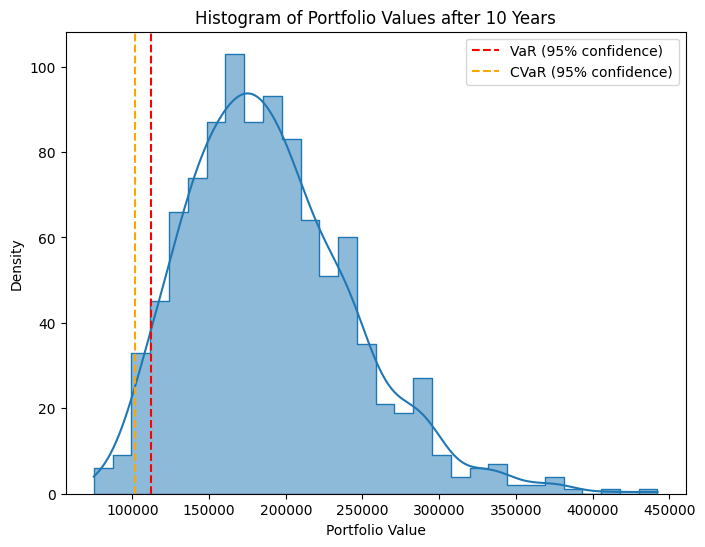

In [33]:
# Plotting a histogram of the portfolio values using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_portfolio_values['Year 10'], bins=30, kde=True, element='step')
plt.xlabel('Portfolio Value')
plt.ylabel('Density')
plt.title('Histogram of Portfolio Values after 10 Years')

# Calculate risk metrics
var_95 = df_portfolio_values['Year 10'].quantile(0.05)
cvar_95 = df_portfolio_values['Year 10'][df_portfolio_values['Year 10'] <= var_95].mean()

# Add vertical lines to mark Value-at-Risk (VaR) and Conditional Value-at-Risk (CVaR)
plt.axvline(x=var_95, color='red', linestyle='--', label='VaR (95% confidence)')
plt.axvline(x=cvar_95, color='orange', linestyle='--', label='CVaR (95% confidence)')

plt.legend()
plt.show()

### Conclusion

In this example, we consider an investment portfolio consisting of stocks, bonds, and real estate. We specify the weights, historical returns, and standard deviations for each asset. We set the simulation parameters to run 1000 simulations over a 10-year time horizon.

The Monte Carlo simulation generates random samples for each asset's future returns using the normal distribution with the specified mean returns and standard deviations. The future portfolio values are calculated by multiplying the previous portfolio value by the weighted returns for each simulation.

The simulation results are stored in a dataframe df_portfolio_values, which contains the portfolio values for each simulation and year. We calculate descriptive statistics, including mean, standard deviation, minimum, and maximum values. We construct confidence intervals to estimate the range of potential future portfolio values.

We visualize the distribution of portfolio values after 10 years using a histogram. Additionally, we calculate risk metrics such as Value-at-Risk (VaR) and Conditional Value-at-Risk (CVaR) at the 95% confidence level.

Finally, we print the descriptive statistics, confidence intervals, and risk metrics to assess the portfolio's potential future value and associated risks.

Feel free to modify the example by adjusting the asset allocation, historical returns, standard deviations, simulation parameters, or any other aspect to match your specific requirements.

Please note that this example assumes a simplified scenario and should not be considered as financial advice. It's crucial to conduct further research and consult with a financial professional before making any investment decisions.